# Chapter 13 Multivariate PMFs and Densities

## Python Code

In [199]:
from scipy.special import comb
from scipy.stats import expon
from scipy.special import factorial
from scipy.stats import norm
from scipy.stats import multivariate_normal
from scipy.integrate import dblquad, quad

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Eq 13.1

In [2]:
def multiv_dist_marbles():
    """ Probability of Y=i and B=k """
    num_yellows = 2
    num_blues = 3
    num_greens = 4
    num_total_to_pick = 4

    probas = []
    
    for i in range(num_yellows + 1):
        i_row = []
        for j in range(num_blues + 1):
            proba_i_j = comb(num_yellows, i) * \
                comb(num_blues, j) * \
                comb(num_greens, num_greens - i - j) / \
                comb(num_yellows + num_blues + num_greens, num_total_to_pick)
            i_row.append(proba_i_j)
            
        probas.append(np.array(i_row))
        
    return pd.DataFrame(np.array(probas))

In [3]:
dist_marbles = multiv_dist_marbles()
dist_marbles

,0,1,2,3
0,0.007937,0.095238,0.142857,0.031746
1,0.063492,0.285714,0.190476,0.015873
2,0.047619,0.095238,0.023810,0.000000


In [4]:
dist_marbles.values

array([[ 0.00793651,  0.0952381 ,  0.14285714,  0.03174603],
       [ 0.06349206,  0.28571429,  0.19047619,  0.01587302],
       [ 0.04761905,  0.0952381 ,  0.02380952,  0.        ]])

In [5]:
dist_marbles.values.shape

(3, 4)

In [6]:
def yellows_less_than_blues(yellows, blues):
    return yellows < blues

def proba(multiv_dist, query):
    proba_val = 0
    
    for i in range(multiv_dist.shape[0]):
        for j in range(multiv_dist.shape[1]):
            if query(i,j):
                proba_val += multiv_dist[i][j]
            
    return proba_val

proba(dist_marbles.values, yellows_less_than_blues)

0.47619047619047616

In [7]:
def simulate_marbles(
    num_pick=4,
    num_yellows=2,
    num_blues=3,
    num_greens=4,
    query=yellows_less_than_blues,
    num_experiments=10000
):
    to_choose_from = np.concatenate(
        [
            np.ones(num_yellows) * 1,
            np.ones(num_blues) * 2,
            np.ones
        ]
    )
    for i in range(num_experiments):
        np.random.choice()
    
    

## Exercises

### 1. Suppose the random pair $(X,Y)$ has the density $f_{X,Y}(s,t) = 8st$ on the triangle $\{(s,t): 0 < t < s < 1\}$.
    
(a). Find $f_X(s)$

$$
\begin{equation}
\begin{aligned}
    f_X(s) &= \int_{t=0}^{t=s}f_{X,Y}(s,t) \cdot dt && \text{integrate out $t$}\\
    &= \int_{t=0}^{t=s}8st \cdot dt \\
    &= s \int_{t=0}^{t=s} 8t \cdot dt \\
    &= s(4t^2)\big|_{t=0}^{t=s} \\
    &= 4s^3
\end{aligned}
\end{equation}
$$
    (b). Find $P(X<Y/2)$.

$$
\begin{equation}
\begin{aligned}
    P(X<Y/2) &= \int_{t=0}^{t=1}\int_{s=0}^{s=t/2}8st \cdot dsdt \\
    &= \int_{t=0}^{t=1}t4(s^2)\big|_{s=0}^{s=t/2} \cdot dt \\
    &= \int_{t=0}^{t=1}t4\big[\big(\frac{t}{2}\big)^2 - (0)^2\big] \cdot dt \\
    &= \int_{t=0}^{t=1}t^3 \cdot dt \\
    &= \frac{t^4}{4}\big|_{t=0}^{t=1} \\
    &= \frac{1}{4}
\end{aligned}
\end{equation}
$$


#### Approximation 1b

In [8]:
def approx_1b():
    """ Approximate the double integral by doing double sums. """
    sums = 0.0
    #rng = np.linspace(0,1 - 1.0/1000.0, num=1000)
    t= 0
    while t < 1.0:
        s = 0
        while s < t / 2:
            # the sum is approximated by length * width * height,
            # where the length is 0.001, width is 0.001
            # height is given as 8st
            sums += 8*s*t * 0.000001
            s += 0.001
        t += 0.001
    return sums 

In [9]:
approx_1b()

0.24916783217600103

### 2. Suppose packets on a network are of three types. In general, $40%$ of the packets are of type $A$, $40%$ have type B, and $20%$ have type $C$. We observe six packets, and denote the numbers of packets of types $A$, $B$ and $C$ by $X$, $Y$, $Z$, respectively.

#### (a) $P(X=Y=Z=2)$

$$
\begin{equation}
\begin{aligned}
    P(X=Y=Z=2) &= \frac{6!}{2!2!2!}(0.4)^2(0.4)^2(0.2)^2 && \text{multinomial dist.}\\
    &= 0.09216
\end{aligned}
\end{equation}
$$


In [10]:
factorial(6) / (factorial(2) * factorial(2) * factorial(2))* (0.4)**2 *(0.4)**2 * (0.2)**2

/Users/eddericugaddan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  if __name__ == '__main__':


0.092160000000000047

#### (b) Find $Cov(X,Y+Z)$

$$
\begin{equation}
\begin{aligned}
    X + Y + Z &= 6 \\
    Y + Z &= 6 - X 
    Cov(X,Y+Z) &= Cov(X,6-X) \\
    &= E[X\cdot(6-X)]-EX \cdot E(6-X) \\
    &= E(6X-X^2)-EX\cdot (E(6) - E(X)) \\
    &= 6EX-E(X^2)-6EX+E(X)^2 \\
    &= E(X^2) - E(X)^2 \\
    &= Var(X) \\
    &= 6(0.4)(1-0.4) \\
    &= 1.44
\end{aligned}
\end{equation}
$$


#### (c) To what parametric family in this book does the distribution of $Y+Z$ belong?

Y+Z is binomially distributed, with $n=6, p=(0.4+0.2)=0.6$

### 3. Suppose $X$ and $Y$ are independent, each having an exponential distribution with means $1.0$ and $2.0$, respectively. Find $P(Y>X^2)$.

In [11]:
# approximation
(expon.rvs(scale=2.0, size=10000) \
 > (expon.rvs(scale=1,size=10000)**2)\
).sum() / 10000.0

0.65639999999999998

Note: The following integral seemed difficult to calculate by hand. So I looked at Wolfram Alpha to see if there are step-by-step solutions available for this double integral. Normally it shows solutions. However, this time, it only gave the exact solution, which makes me think that it's probably hard/impossible to calculate by hand.

$$
\begin{equation}
\begin{aligned}
    \int_{b=0}^{b=\infty}\int_{a=b^2}^{a=\infty}\frac{e^{-a/2}}{2}e^{-b}dadb &= 0.65568 && \text{Wolfram Alpha Pro}
\end{aligned}
\end{equation}
$$


In [12]:
expon.pdf(1, scale=2.0)

0.30326532985631671

In [13]:
expon.pdf(1, scale=0.5) / 2

0.1353352832366127

### 4. Suppose the pair $(X,Y)'$ has a bivariate normal distribution with mean vector (0,2) and covariance matrix $\begin{pmatrix} 1 & 2 \\ 2 & 6 \end{pmatrix}$

#### (a) Set up (but do not evaluate) the double integral for the exact value of $P(X^2 + Y^2 \leq 2.8)$

Let $\mu_1 = 0, \mu_2 = 2, \sigma_1 = 1, \sigma_2 = \sqrt{6}$, and $\rho=\begin{pmatrix} 1 & 2 \\ 2 & 6\end{pmatrix}$. 


$$
\begin{equation}
\begin{aligned}
    f_{X,Y}(s,t) &= \frac{1}{2\pi \sigma_1 \sigma_2 \sqrt{1-\rho^2}}e^{-\frac{1}{2(1-\rho^2)}\big[\frac{(s-\sigma_1)^2}{\sigma_1^2} + \frac{(t-\sigma_2)^2}{\sigma_2^2} - \frac{2\rho(s-\sigma_1)(t-\sigma_2)}{\sigma_1\sigma_2}\big]} \\
    \int_{t=-\sqrt{2.8}}^{t=\sqrt{2.8}}\int_{-\sqrt{2.8-t^2}}^{\sqrt{2.8-t^2}} f_{X,Y}(s,t) &= P(X^2 + Y^2 \leq 2.8)
\end{aligned}
\end{equation}
$$

#### (b) Using the matrix methods of Section 12.4, find the covariance matrix of the pair $U = (X+Y,X-2Y)'$. Does $U$ have a bivariate normal distribution?

$U$ does have a bivariate normal distribution because $U$ is a linear combination of bivariate random vector (X,Y)'.

$$
\begin{equation}
\begin{aligned}
    U &= \begin{pmatrix} X+Y \\ 
            X-Y \end{pmatrix} \\
    W &= \begin{pmatrix} X \\
            Y \end{pmatrix} \\
    Cov(W) &= \begin{pmatrix}
            Var(X) & Cov(X,Y) \\
            Cov(X,Y) & Var(Y) 
            \end{pmatrix} \\
    Var(X) &= 1 \\
    Cov(X,Y) &= 2 \\
    Var(Y) &= 6 \\
    A &= \begin{pmatrix} 1 & 1 \\
            1 & -1 \end{pmatrix} \\
    A' &= \begin{pmatrix} 1 & 1 \\
            1 & -1 \end{pmatrix} \\
    Cov(U) &= ACov(W)A' \\
           &= \begin{pmatrix} 11 & -5 \\
           -5 & 3 \end{pmatrix}
\end{aligned}
\end{equation}
$$


In [14]:
def compute_4b():
    a = np.array([[1, 1],[1, -1]])
    cov_w = np.array([[1,2], [2,6]])
    
    return a.dot(cov_w).dot(a.T)

compute_4b()

array([[11, -5],
       [-5,  3]])

### 5. Suppose $X$ and $Y$ are independent, and each has a $U(0,1)$ distribution. Let $V=X+Y$.

#### (a) Find $f_V$.

$$
\begin{equation}
\begin{aligned}
    f_V(t) &= \int_{s=0}^{s=t} f_X(s)f_Y(t-s)ds && \text{sum of independent R.V. is equal to convolution of the two R.V.} \\
    &= \int_{s=0}^{s=1} f_Y(t-s) ds && \text{$f_X(s)$ is $1$ if $0<s<1$, 0 otherwise} \\
\end{aligned}
\end{equation}
$$

Case 1: When $0<t<1$, $f_Y(t-s) = 1$ if $0<s<t$, $0$ otherwise. Therefore:

$$
\begin{equation}
\begin{aligned}
   \int_{0}^{t}ds &= s\Big|_0^t\\ 
   &= t
\end{aligned}
\end{equation}
$$

Case 2: When $1<t<2$, $f_Y(t-s) = 1$ if $t-1 \leq s \leq 1$, $0$ otherwise. Therefore:

$$
\begin{equation}
\begin{aligned}
   \int_{t-1}^{1}ds &= s\Big|_{t-1}^1&& \text{When $1<t<2$ } \\ 
   &= 1-(t-1) \\
   &= 2-t
\end{aligned}
\end{equation}
$$


#### (b) Verify your answer in (a) by finding $EV$ from your answer in (a) and then using the fact that $EX=EY=0.5$

$$
\begin{equation}
\begin{aligned}
    V &= X+Y \\
    EV &= E(X+Y) \\
       &= EX + EY \\
       &= 0.5 + 0.5 \\
       &= 1
\end{aligned}
\end{equation}
$$

$$
\begin{equation}
\begin{aligned}
    EV &= \int_0^t t(t)dt + \int_1^2 t(2-t)dt \\
       &= \frac{t^3}{3}\Big|_0^1 + t^2\Big|_1^2 - \frac{t^3}{3}\Big|_1^2 \\
       &= \frac{1}{3}+4-1-\Big(\frac{8}{3}-\frac{1}{3}\Big) \\
       &= 1
\end{aligned}
\end{equation}
$$


#### \* In the general population of parents who have 10-year-old kids, the parent/kid weight pairs have an exact bivariate normal distribution

#### \* Parents' weights have mean 152.6 and standard deviation 25.0.

#### \* Weights of kids have mean 62 and standard deviation 6.4.

#### \* The correlation between parents' and kids' weights is 0.4.

Use R functions (not simulation) in the following:

#### (a) Find the fraction of parents who weigh more than 160.

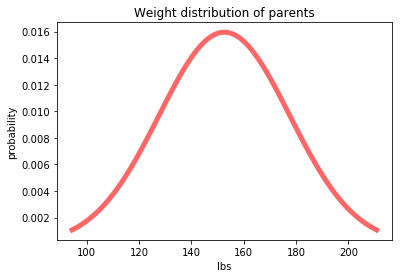

In [15]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(
    norm.ppf(0.01, loc=152.6, scale=25.0),
    norm.ppf(0.99, loc=152.6, scale=25.0), 
    100
)
ax.plot(x, norm.pdf(x, loc=152.6, scale=25.0),
       'r-', lw=5, alpha=0.6, label='norm pdf')
ax.set_title('Weight distribution of parents')
ax.set_xlabel('lbs')
ax.set_ylabel('probability')

In [16]:
# About 38.4% of parents weigh more than 160 lbs.
norm.cdf(
    norm.ppf(0.9999, loc=152.6, scale=25.0),
    loc=152.6, 
    scale=25.0
) - norm.cdf(
    160.0,
    loc=152.6, 
    scale=25.0
) 

0.38351504069809861

In [17]:
def simulate_parents_weights_1():
    """ 
        Define normal distribution pdf and then find the area
        from 160 lbs to infinity
    """
    
    num_points = 1000
    _min = 160
    _max = 260
    x = np.linspace(_min, _max, num=num_points)
    std_dev = 25.0
    mean = 152.6
    
    vals = 1.0 / (2*np.pi*std_dev*std_dev)**0.5*np.exp(-(x-mean)**2 / (2*std_dev**2))
    width = (_max-_min) / num_points
    return (vals * width).sum()

In [18]:
simulate_parents_weights_1()

0.38398665340889954

#### (b) Find the fraction of kids who weigh less than 56.

In [19]:
norm.cdf(56, loc=62, scale=6.4)

0.17425071188054242

#### (c) Find the fraction of parent/child pairs in which the parent weighs more than 160 and the child weighs less than 56.

In [20]:
# Cov(X,Y) = Corr(X,Y) * std_dev(X) * std_dev(Y)
0.4 * (25*6.4)

64.0

In [21]:
# About 0.03 of parent/child pairs have the parents 
# weighing more than 160 and the child weighs less 
# than 56.

def bivariate(y,x):
    """ y is kids, x is parents """
    return multivariate_normal.pdf(
        [x,y],
        mean=[152.6, 62.0],
        cov=np.array([[25.0**2, 64], [64, 6.4**2]])
    )

dblquad(
    bivariate,
    a=160,
    b=np.inf,
    gfun=lambda x: 0,
    hfun=lambda x: 56
)

(0.02987677566007454, 1.4747870275913424e-08)

#### (d) Suppose a ride at an amusement park charges by weight, one cent for each poind of weight in the parent and child. State the exact distribution of the fee, and find the fraction of parent/child pairs who are charged less than \$2.00.

$$
\begin{equation}
\begin{aligned}
    X &= \begin{pmatrix} P \\ K \end{pmatrix} && \text{$P$ are parents' weights, $K$ are kids' weights}\\
    A &= \begin{pmatrix} 0.01 & 0.01 \end{pmatrix} && \text{price per weight} \\
    Y &= AX && \text{$Y$ is the distribution of the fee}\\
    &= 0.01P+0.01K \\
\end{aligned}
\end{equation}
$$

$$
\begin{equation}
\begin{aligned}
    EY &= E(AX) \\
    &= AEX \\
    &= A\mu \\
    &= 0.01EP + 0.01EK \\
    &= 2.146 \\
\end{aligned}
\end{equation}
$$


$$
\begin{equation}
\begin{aligned}
    Cov(Y) &= Cov(AX) \\
    &= ACov(X)A' \\
    &= \begin{pmatrix} 0.01 & 0.01 \end{pmatrix} \begin{pmatrix} 625 & 160 \\ 160 & 40.96 \end{pmatrix} \begin{pmatrix} 0.01 \\ 0.01 \end{pmatrix} \\
    &= 0.098596 \\
    &= Var(Y)
\end{aligned}
\end{equation}
$$


In [22]:
np.array([0.01, 0.01]).dot(
    np.array([
        [625, 160],
        [160, 40.96]
    ])
).dot(np.array([[0.01], [0.01]]))

array([ 0.098596])


$$
\begin{equation}
\begin{aligned}
    \int_0^2 f_Y(t) dt
\end{aligned}
\end{equation}
$$


In [23]:
# 32.1% chance that the amount of money to be paid 
# is less than $2
norm.cdf(2, loc=2.146, scale=0.098596**0.5) - \
    norm.cdf(0, loc=2.146, scale=0.098596**0.5) 

0.32097713160406532

### 6. Newspapers at a certain vending machine cost 25 cents. Suppose 60% of the customers pay with quarters, 20% use two dimes and a nickel, 15% insert a dime and three nickels, and 5% deposit five nickels. When the vendor collects the money, five coins fall to the ground. Let X,Y, and Z denote the numbers of quarters, dimes, and nickels among these five coins.

#### (a) Is the joint distribution $(X,Y,Z)$ a member of a parametric family presented in this chapter? If so, which one?

If the sample size of the coins is big enough such that each coin falling is essentially independent of the rest, then this is multinomially distributed.

In [24]:
np.random.choice([
    'quarter', 
    'two_dimes_and_nickel',
    'one_dime_and_three_nickels',
    'five_nickels'
], size=12, p=[
    0.6,0.2,0.15,0.05
])

array(['quarter', 'quarter', 'quarter', 'two_dimes_and_nickel',
       'one_dime_and_three_nickels', 'one_dime_and_three_nickels',
       'two_dimes_and_nickel', 'quarter', 'quarter', 'quarter', 'quarter',
       'two_dimes_and_nickel'],
      dtype='<U26')

In [25]:
def find_proportion_of_q_d_n():
    sample_size = 10000
    choices = np.random.choice([
        'quarter', 
        'two_dimes_and_nickel',
        'one_dime_and_three_nickels',
        'five_nickels'
    ], size=sample_size, p=[
        0.6,0.2,0.15,0.05
    ])
    
    q_d_n_counts = np.array([0,0,0])
    
    for choice in choices:
        if choice == 'quarter':
            q_d_n_counts += np.array([1,0,0])
        elif choice == 'two_dimes_and_nickels':
            q_d_n_counts += np.array([0,2,1])
        elif choice == 'one_dime_and_three_nickels':
            q_d_n_counts += np.array([0,1,3])
        elif choice == 'five_nickels':
            q_d_n_counts += np.array([0,0,5])
            
    return q_d_n_counts / q_d_n_counts.sum()

find_proportion_of_q_d_n()

array([ 0.4136162 ,  0.10205214,  0.48433167])

#### (b) Find $P(X=2,Y=2,Z=1)$

$$
\begin{equation}
\begin{aligned}
    P(X=2,Y=2,Z=1) &\approx \frac{5!}{2!2!1!}\cdot
    0.425^2 \cdot 0.102^2 \cdot 0.473^1 \\
    &\approx 0.027
\end{aligned}
\end{equation}
$$



In [26]:
# There is about a 
factorial(5) / (2*2*1) * 0.425**2 * 0.102**2 * 0.473

/Users/eddericugaddan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  from ipykernel import kernelapp as app


0.026666167274999989

#### (c) Find $\rho(X,Y)$.

Assuming that a coin dropping does not tell us any information about another, then $X$ and $Y$ are independent. Therefore, the $\rho(X,Y)$ must be $0$.

### 7. Jack and Jill play a dice game, in which one wins \$1 per dot. There are three dice, die A, die B, and die C. Jill always rolls dice A and B. Jack always roll just die C, but he also gets credit for $90\%$ of die B. For instance, say in a particular roll A,B, and C are 3,1, and 6 respectively. Then Jill would win \$4 and Jack would get \$6.90. Let $X$ and $Y$ be Jill's and Jack's total winnings after 100 rolls. Use the Central Limit Theorem to find the approximate values of $P(X>650, Y<660)$ and $P(Y>1.06X)$.

### Hints: This will follow a similar pattern to the dice game in Section 12.7, which we win \$5 for one dot, and \$2 for two or three dots. Remember, in that example, the key was that we noticed that the pair $(X,Y)$ was a sum of random pairs. That meant that $(X,Y)$ had an approximate bivariate normal distribution, so we could find probabilities if we had the mean vector and covariance matrix of $(X,Y)$. Thus we needed to find $EX, EY, Var(X), Var(Y)$ and $Cov(X,Y)$. We used the various properties of $E(), Var(),$ and $Cov()$.

$A_1, B_1, C_1$ are the number of dots in the first roll of die $A, B, C$. $U_1$ is Jill's payoff for the 1st roll, while $V_1$ is Jack's prize for the 1st roll. 

$$
\begin{equation}
\begin{aligned}
    X &= U_1 + ... + U_{100} \\
    &= 100U_1 && \text{i.i.d} \\
    &= 100(A_1 + B_1) \\
\end{aligned}
\end{equation}
$$


$$
\begin{equation}
\begin{aligned}
    EX &= E(100(A_1+B_1)) \\
    &= 200\sum_1^6iP(A=i) \\
    &= 200 \cdot 3.5 \\
    &= 700
\end{aligned}
\end{equation}
$$


$$
\begin{equation}
\begin{aligned}
    Var(X) &= Var(U_1 + ... + U_{100}) \\
    &= Var(U_1) + ... + Var(U_{100}) && \text{independence} \\
    &= 100Var(U_1) && \text{identical} \\
    &= 100Var(A_1 + B_1) \\
    &= 100Var(A_1)+100Var(B_1) \\
    &= 200Var(A_1) \\
    &= 200\Big(\frac{91}{6} - 3.5^2\Big) \\
    &= 583.\bar{3}
\end{aligned}
\end{equation}
$$


$$
\begin{equation}
\begin{aligned}
    Y &= V_1 + ... + V_{100} \\
    &= 100V_1 && \text{i.i.d} \\
    &= 100(0.9B_1+ C_1) \\
    &= 90B_1+100C_1
\end{aligned}
\end{equation}
$$


$$
\begin{equation}
\begin{aligned}
    EY &= E(90B_1+100C_1) \\
    &= 90E(B_1) + 100E(C_1) \\
    &= 90\cdot3.5 + 100\cdot3.5 \\
    &= 665
\end{aligned}
\end{equation}
$$

$$
\begin{equation}
\begin{aligned}
    Var(Y) &= Var(V_1 + ... + V_{100}) \\
    &= Var(V_1) + ... + Var(V_{100}) && \text{var. of sum of independent R.V.s}\\
    &= 100Var(V_1) && \text{indep.} \\
    &= 100Var(0.9B_1 + C_1) \\
    &= 100[0.9^2Var(B_1) + Var(C_1)] && \text{indep.} \\
    &= 81Var(B_1) + 100Var(C_1) \\
    &= 181Var(B_1) && \text{identically-dist.} \\
    &= 181\Big(\frac{91}{6} - 3.5^2\Big) \\
    &= 527.91\bar{6} 
\end{aligned}
\end{equation}
$$

Calculate Cov(X,Y) one way, *but for some reason is incorrect*. Not sure why. See below for a different way that actually gets to the right answer.

$$
\begin{equation}
\begin{aligned}
    Cov(X,Y) &= E(XY) - E(X)E(Y) \\
    &= E[(X_1 + ... + X_{100})(Y_1 + ... + Y_{100})] - 700\cdot665 \\
    &= 10000E(X_1Y_1) - 700\cdot665 \\
    &= 10000E[(A_1+B_1)(0.9B_1+C_1)] - 465500 \\
    &= 10000E[0.9A_1B_1 + A_1C_1 + 0.9B_1^2 + B_1C_1] -465500 \\
    &= 9000E(A_1B_1) + 10000E(A_1C_1) + 9000E(B_1^2) + 10000E(B_1C_1)- 465500 \\
    &= 9000E(A_1)E(B_1) + 10000E(A_1)E(C_1) + 9000E(B_1^2) + 10000E(B_1)E(C_1) - 465500 && \text{independence} \\
    &= 9000\cdot3.5^2 + 10000\cdot3.5^2 + 9000\cdot\frac{91}{6}  + 10000\cdot3.5^2 - 465500 \\
    &= 29000\cdot3.5^2+9000\cdot\frac{91}{6} - 465500 \\
    &= 491750 - 465500 \\
    &= 26250
\end{aligned}
\end{equation}
$$

Here's a correct way of calculating $Cov(X,Y)$:

$$
\begin{equation}
\begin{aligned}
    Cov(X,Y) &= Cov(X_1+...+X_100, Y_1+...+Y+100) \\
    &= 100Cov(X_1,Y_1) && \text{i.i.d.} \\
    &= 100\begin{pmatrix} 
        X_1 & Y_1
        \end{pmatrix} \\
\end{aligned}
\end{equation}
$$

We can represent $X_1$ and $Y_1$ as a sum of random variables $A_1,B_1,$ and $C_1$:

$$
\begin{equation}
\begin{aligned}
    &= \begin{pmatrix} 1 & 1 & 0 \\
        0 & 0.9 & 1 \end{pmatrix} \begin{pmatrix} 
            A_1 \\
            B_1 \\
            C_1 \\ \end{pmatrix} \\
\end{aligned}
\end{equation}
$$

Thus, back to solving $100Cov([X_1,Y_1])$:

$$
\begin{equation}
\begin{aligned}
    100 \cdot Cov([X_1,Y_1]) &= 100 \cdot \begin{pmatrix} 1 & 1 & 0 \\
        0 & 0.9 & 1 \end{pmatrix} \begin{pmatrix} Var(A_1) & Cov(A_1,B_1) & Cov(A_1,B_1) \\
            Cov(A_1,B_1) & Var(B_1) & Cov(B_1,C_1) \\
            Cov(A_1,C_1) & Cov(B_1,C_1) & Var(C_1) \end{pmatrix}
            \begin{pmatrix}
        1 & 0 \\
        1 & 0.9 \\
        0 & 1 \end{pmatrix} \\
        &= 100\cdot\begin{pmatrix} 1 & 1 & 0 \\
        0 & 0.9 & 1 \end{pmatrix} \begin{pmatrix} 2.91\bar{6} & 0 & 0 \\
            0 & 2.91\bar{6} & 0 \\
            0 & 0 & 2.91\bar{6} \end{pmatrix}
            \begin{pmatrix}
        1 & 0 \\
        1 & 0.9 \\
        0 & 1 \end{pmatrix} \\
        &= \begin{pmatrix} 583.33 & 262.50 \\
                262.50 & 527.92 \end{pmatrix}
\end{aligned}
\end{equation}
$$

Thus the parameters of the bivariate normal distribution are the following. Random mean vector is [700, 665], and the covariance matrix is $\begin{pmatrix} 583.33 & 262.50 \\
                262.50 & 527.92\end{pmatrix}$

Direct simulation and analytical integration of the multivariate normal distribution shows that $P(X>650, Y<660) \approx 0.4$ and $P(Y>1.06X)\approx0.001$.


In [149]:
np.array([
    [1,1,0],
    [0,0.9,1]
]).dot([
    [2.916666,0,0],
    [0,2.916666,0],
    [0,0,2.916666]
]).dot(np.array([
    [1,1,0],
    [0,0.9,1]
]).T)

array([[ 5.833332  ,  2.6249994 ],
       [ 2.6249994 ,  5.27916546]])

In [162]:
def jack_and_jill(proba_function):
    """ Approximate calculating probability via simulation """
    possible_dice_values = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0])
    results = {'X':[], 'Y':[]}
    num_experiments = 100000
        
    for i in range(num_experiments):  
        jill_money = 0.0
        jack_money = 0.0
        jill_values = []
        jack_values = []
        
        for j in range(100):
            a = np.random.choice(possible_dice_values)
            b = np.random.choice(possible_dice_values)
            c = np.random.choice(possible_dice_values)
        
            jill_money += a + b
            jack_money += 0.9*b + c
            
            jill_values.append(jill_money)
            jack_values.append(jack_money)
            
        proba_function({
            'jill_money': jill_money,
            'jack_money': jack_money,
            'results': results
        })
        
    return results

In [163]:
def jack_and_jill_values(args):
    args['results']['X'].append(args['jill_money'])
    args['results']['Y'].append(args['jack_money'])

In [225]:
jjv = jack_and_jill(jack_and_jill_values)

In [165]:
np.array(jjv['X']).mean()

699.91741999999999

In [166]:
np.array(jjv['Y']).mean()

664.93402499999968

In [167]:
np.array(jjv['X']).var()

582.51056054359981

In [168]:
np.array(jjv['Y']).var()

524.24487339937514

In [169]:
(np.array(jjv['X']) * np.array(jjv['Y'])).mean() - np.array(jjv['X']).mean() *  np.array(jjv['Y']).mean()

260.67309878458036

In [170]:
np.cov(np.array(jjv['X']), np.array(jjv['Y']))

array([[ 582.51638571,  260.67570554],
       [ 260.67570554,  524.2501159 ]])

In [171]:
(np.array(jjv['Y']) > np.array(jjv['X']) * 1.06).sum()/ float(len(jjv['Y']))

0.00093000000000000005

In [157]:
def bivariate_jack_and_jill_analytical(y,x):
    """ y is Jack's payoff, x is Jill's payoff """
    return multivariate_normal.pdf(
        [x,y],
        mean=[700.0, 665.0],
        cov=np.array([
            [ 583.33,  262.50 ],
            [ 262.50 , 527.92 ]
        ])
    )


def bivariate_jack_and_jill_est_from_sim(y,x):
    """ y is Jack's payoff, x is Jill's payoff """
    return multivariate_normal.pdf(
        [x,y],
        mean=[700.19069999999999, 665.22900999999979],
        cov=np.array([
            [ 591.36206972,  262.50  ],
            [ 262.712119  ,  527.92 ]
        ])
    )

# P(X>650, Y<660)

dblquad(
    bivariate_jack_and_jill_est_from_sim,
    a=650,
    b=np.inf,
    gfun=lambda x: 0,
    hfun=lambda x: 660
)

(0.3934715023195603, 1.4643330187899106e-08)

In [158]:
dblquad(
    bivariate_jack_and_jill_analytical,
    a=650,
    b=np.inf,
    gfun=lambda x: 0,
    hfun=lambda x: 660
)

(0.39749484924534484, 1.444891998506493e-08)

In [153]:
def calculate_proba_X_gt_660_Y_lt_sampling_mvn():
    size = 10000
    multiv = np.random.multivariate_normal(
        mean=[700.0, 665.0],
        cov=np.array([
            [ 583.33,  262.50 ],
            [ 262.50 , 527.92 ]
        ]),
        size=size
    )
    
    return ((multiv.T[0] > 650) * (multiv.T[1] < 660)).sum() / size

In [154]:
calculate_proba_X_gt_660_Y_lt_sampling_mvn()

0.40079999999999999

In [138]:
# P(Y > 1.06X)
dblquad(
    bivariate_jack_and_jill_est_from_sim,
    a=0,
    b=np.inf,
    gfun=lambda x: 1.06*x,
    hfun=lambda x: np.inf
)

(4.05738918013316e-19, 8.02172083289793e-19)

In [161]:
# P(Y > 1.06X)
dblquad(
    bivariate_jack_and_jill_analytical,
    a=0,
    b=np.inf,
    gfun=lambda x: 1.06*x,
    hfun=lambda x: np.inf
)

(2.2742811873287656e-19, 4.496401003283657e-19)

In [155]:
def calculate_proba_Y_gt_106X():
    size = 10000
    multiv = np.random.multivariate_normal(
        mean=[700.0, 665.0],
        cov=np.array([
            [ 583.33,  262.50 ],
            [ 262.50 , 527.92 ]
        ]),
        size=size
    )
    
    return (multiv.T[1] > (multiv.T[0] * 1.06)).sum() / size  

In [156]:
calculate_proba_Y_gt_106X()

0.0011999999999999999

### 8. Consider the coin game in Section 4.8. Find $F_{X_3,Y_3}(0,0)$

$X_3$ is the number of heads Jack has gotten through his 3rd toss. Similarly, $Y_3$ is the number of heads Jill has gotten through his 3rd toss. Jack gets a headstart of two turns.

$$
\begin{equation}
\begin{aligned}
    F_{X_3,Y_3}(0,0) &= \sum_{i=0}^0 \sum_{j=0}^0 P(X_3=i, Y_3=j) \\
    &= P(X_3=0, Y_3=0) \\
    &= P(X_3=0)P(Y_3=0) && \text{independent} \\
    &= {3 \choose 0}(0.5)^0(1-0.5)^{3-0} \cdot {1 \choose 0}(0.5)^0(1-0.5)^{1-0} \\
    &= 0.0625
\end{aligned}
\end{equation}
$$


In [172]:
def simulate_coin_toss_jack_jill():
    size=10000
    X = np.random.binomial(n=3,p=0.5,size=size)
    Y = np.random.binomial(n=1,p=0.5,size=size)
    
    return ((X == 0) * (Y==0)).sum() / size
    

In [173]:
simulate_coin_toss_jack_jill()

0.062100000000000002

### 9. Suppose the random vector $X=(X_1, X_2, X_3)'$ has mean (2.0, 3.0, 8.2)' and covariance matrix $\begin{pmatrix} 1 & 0.4 & -0.2 \\ & 1 & 0.25 \\ & & 3 \end{pmatrix}$

#### (a) Fill in the missing entries.

$$
\begin{equation}
\begin{aligned}
    \begin{pmatrix} 1 & 0.4 & -0.2 \\ 0.4 & 1 & 0.25 \\ -0.2 & 0.25 & 3 \end{pmatrix}
\end{aligned}
\end{equation}
$$


#### (b) Find $Cov(X_1,X_3)$

$$
\begin{equation}
\begin{aligned}
    Cov(X_1,X_3) &= -0.2
\end{aligned}
\end{equation}
$$

#### (c) Find $\rho(X_2, X_3)$.

$$
\begin{equation}
\begin{aligned}
    \rho(X_2,X_3) &= \frac{Cov(X_2,X_3)}{\sqrt{Var(X_2)Var(X_3)}} \\
    &= \frac{0.25}{\sqrt{1\cdot3}} \\
    &= \frac{0.25}{\sqrt{3}}
\end{aligned}
\end{equation}
$$


#### (d) Find $Var(X_3)$.
$$
\begin{equation}
\begin{aligned}
    Var(X_3) &= 3
\end{aligned}
\end{equation}
$$


#### (e) Find the covariance matrix of $(X_1 + X_2, X_2 + X_3)'$.

$$
\begin{equation}
\begin{aligned}
    [X_1+X_2, X_2+X_3] &= \begin{pmatrix} 
                                1 & 1 & 0 \\ 
                                0 & 1 & 1 \\
                          \end{pmatrix} \cdot \begin{pmatrix} X_1 \\ X_2 \\ X_3 \end{pmatrix} \\
    Cov(X_1+X_2, X_2+X_3) &= \begin{pmatrix} 
                                1 & 1 & 0 \\ 
                                0 & 1 & 1 \\
                          \end{pmatrix} \cdot 
                          \begin{pmatrix} Var(X_1) & Cov(X_1,X_2) & Cov(X_1,X_3) \\
                                          Cov(X_1,X_2) & Var(X_2) & Cov(X_2,X_3) \\
                                          Cov(X_1,X_3) & Cov(X_1,X_2) & Cov(X_3,Y_3) \\
                          \end{pmatrix} \cdot
                          \begin{pmatrix} 
                                1 & 1 & 0 \\ 
                                0 & 1 & 1 \\
                          \end{pmatrix}^T \\
                          &= \begin{pmatrix} 
                                1 & 1 & 0 \\ 
                                0 & 1 & 1 \\
                          \end{pmatrix} \cdot 
                          \begin{pmatrix} 1 & 0.4 & -0.2 \\ 0.4 & 1 & 0.25 \\ -0.2 & 0.25 & 3 \end{pmatrix} \cdot
                          \begin{pmatrix} 
                                1 & 1 & 0 \\ 
                                0 & 1 & 1 \\
                          \end{pmatrix}^T \\       
                          &= \begin{pmatrix} 2.8 & 1.45 \\
                          1.45 & 4.5 \\
                          \end{pmatrix} \\
\end{aligned}
\end{equation}
$$


In [174]:
np.array([
    [1,1,0],
    [0,1,1]
]).dot([
    [1, 0.4, -0.2],
    [0.4, 1, 0.25],
    [-0.2, 0.25, 3]
]).dot(np.array([
    [1,1,0],
    [0,1,1]
]).T)

array([[ 2.8 ,  1.45],
       [ 1.45,  4.5 ]])

#### (f) If in addition we know that $X_1$ has a normal distribution, find $P(1<X_1<2.5)$, in terms of $\phi()$.

$\phi$ assumes $N(0,1)$, so we need to convert lower- and upper-bound limits to Z-scores. $\mu = 2$ and $\sigma^2 = 1$. 

Let $Z_l, Z_m$ represent the lower-bound and upper-bound $Z$-scores.

$$
\begin{equation}
\begin{aligned}
    Z_l &= \frac{X_l-\mu}{\sigma} \\
    &= \frac{1-2}{1} \\
    &= -1
\end{aligned}
\end{equation}
$$

$$
\begin{equation}
\begin{aligned}
    Z_m &= \frac{X_m-\mu}{\sigma} \\
    &= \frac{2.5-2}{1} \\
    &= 0.5
\end{aligned}
\end{equation}
$$

Thus, 

$$
\begin{equation}
\begin{aligned}
    P(1<X_1<2.5) &= \int_{-1}^{0.5} N(0,1) \\
    &\approx 0.533\\
\end{aligned}
\end{equation}
$$


In [176]:
# transformed
norm.cdf(0.5, loc=0, scale=1) - norm.cdf(-1, loc=0, scale=1) 

0.53280720734255604

In [177]:
# non-transformed
norm.cdf(2.5, loc=2, scale=1) - norm.cdf(1, loc=2, scale=1) 

0.53280720734255604

#### (g) Consider the random variable $W=X_1+X_2$. Which of the following is true? _(i)_ $Var(W) = Var(X_1 + X_2)$. _(ii)_ $Var(W) > Var(X_1+X_2)$.  _(iii)_ $Var(W) < Var(X_1+X_2)$. _(iv)_  In order to determine which of the variances is the larger one, we would need to know whether the variables $X_i$ have a multivariate normal distribution. _(v)_ $Var(X_1 + X_2)$ does not exist.

_(i)_ is correct due to substitution.

## 10. Find the (approximate) output of this R code, by using the analytical techniques of this chapter:

```
count <- 0
for (i in 1:10000) {
    count1 <- 0
    count2 <- 0
    count3 <- 0
    for (j in 1:20) {
        x <- runif(1)
        if (x < 0.2) {
            count1 <- count1 + 1
        } else if (x < 0.6) count2 <- count2 + 1 else
                count3 <- count3 + 1
    }
    if (count1 == 9 && count2 == 2 && count3 == 9) count <- count + 1
}
cat(count/10000)
```

$$
\begin{equation}
\begin{aligned}
    P(X=9,Y=2,9=3) &= \frac{20!}{9!2!9!}0.2^9\cdot0.4^2\cdot0.4^9
\end{aligned}
\end{equation}
$$

In [190]:
factorial(20) / (factorial(9)*factorial(2)*factorial(9))*0.2**9*0.4**2*0.4**9

0.00019838024443494422

In [191]:
def simulate_10():
    count = 0
    size=10000
    
    for i in range(size):
        count_1 = 0
        count_2 = 0
        count_3 = 0
        
        samples = np.random.uniform(size=20)
        count_1 += (samples < 0.2).sum()
        count_2 += ((samples > 0.2) * (samples < 0.6)).sum()
        count_3 += (samples > 0.6).sum()
        
        if (count_1 == 9 and count_2 == 2 and count_3 == 9):
            count += 1
    
    return count / size

In [192]:
simulate_10()

0.0001

### 11. Use the convolution formula (13.52) to derive (7.46) for the case $r=2$. Explain your steps carefully!

$$
\begin{equation}
\begin{aligned}
    f_{T_r}(t) &= \frac{1}{(r-1)!}\lambda^r t^{r-1} e^{-\lambda t} \\
    f_{T_2}(t) &= \frac{1}{(2-1)!}\lambda^2 t^{2-1} e^{-\lambda t} && \text{subs. $r=2$}\\
    &= \lambda^2 t e^{-\lambda t} 
\end{aligned}
\end{equation}
$$

$$
\begin{equation}
\begin{aligned}
    T_r &= X_1 + ... X_r \\
    T_2 &= X_1 + X_2 \\
    f_{T_2}(t) &= \int_0^t f_{X_1}(s) f_{X_2}(t-s) ds && \text{Sum of i.i.d R.V.s is convolution of two densities}\\
    &= \int_0^t \lambda e^{-\lambda \cdot s} \cdot \lambda e^{-\lambda \cdot (t-s)} ds\\
    &= \int_0^t \lambda^2 e^{-\lambda t} ds\\
    &= \lambda^2 e^{-\lambda t} s\big|_{0}^{t} \\
    &= \lambda^2 e^{-\lambda t} t
\end{aligned}
\end{equation}
$$


### 12. The book, _Last Man Standing_, author D. McDonald writes the following about the practice of combining many mortgage loans into a single package sold to investors:

    Even if every single [loan] in the [package] had a 30-percent risk of default, the thinking went, the odds that most of them would default at once were arguably infinitesimal...What [this argument] missed was the auto-synchronous relationship of many loans...[If several of them] are all mortgage for houses sitting next to each other on a beach...one strong hurricane and the [loan package] would be decimated.
    
Fill in the blank with a term from this book: The author is referring to an unwarranted assumption of _____________.

Ans: independence

### 13. Consider the computer worm example in Section 9.3.1. Let $R$ denote the time it takes to go from state 1 to state 3. Find $f_R(v)$. (Leave your answer in integral form.)

$$
\begin{equation}
\begin{aligned}
    f_R(v) &= \int_1^3 \frac{1}{v(g-v)}dv
\end{aligned}
\end{equation}
$$


### 14. Suppose (X,Y) has a bivariate normal distribution, with $EX = EY = 0, Var(X)=Var(Y)=1$,  and $\rho(X,Y)=0.2$. Find the following, leaving your answers in integral form:

#### (a) $E(X^2 + XY^{0.5})$

$$
\begin{equation}
\begin{aligned}
    E(X^2 + XY^{0.5}) &= E(X^2) + E(XY^{0.5}) && \text{linearity of expectations} \\
    &= \int_{-\infty}^{\infty}x^2f_X(x)dx + \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}xy^{0.5}f_{X,Y}(x,y)dxdy \\
    &= \int_{-\infty}^{\infty}x^2 \frac{e^{-x^2}}{ \sqrt{2\pi}}dx + 
        \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}
        xy^{0.5} \frac{e^{-\frac{
            x^2+y^2-0.4xy
        }{
            2\sqrt{0.96}
        }}}{2\pi\sqrt{0.96}} dxdy
\end{aligned}
\end{equation}
$$


#### (b) $P(Y>0.5X)$

$$
\begin{equation}
\begin{aligned}
    P(Y>0.5X) &= \int_{0.5x}^{\infty}\int_{-\infty}^{\infty}
        \frac{e^{-\frac{
            x^2+y^2-0.4xy
        }{
            2\sqrt{0.96}
        }}}{2\pi\sqrt{0.96}} dxdy
\end{aligned}
\end{equation}
$$


#### (c) $F_{X,Y}(0.6, 0.2)$

$$
\begin{equation}
\begin{aligned}
    F_{X,Y}(0.6, 0.2) &= \int_{-\infty}^{0.2}\int_{-\infty}^{0.6}
        \frac{e^{-\frac{
            x^2+y^2-0.4xy
        }{
            2\sqrt{0.96}
        }}}{2\pi\sqrt{0.96}} dxdy
\end{aligned}
\end{equation}
$$
